In [2]:
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pylab as plt
import matplotlib

In [3]:
mnist = fetch_openml('mnist_784', version= 1, as_frame= False)


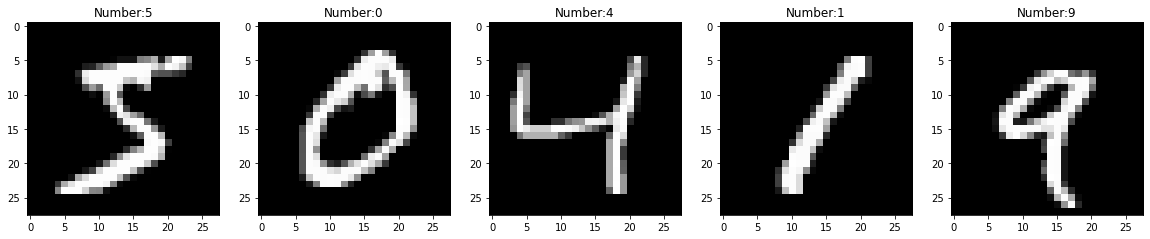

In [4]:
plt.figure(figsize=(20,4))
for index,(image, label) in enumerate(zip(mnist.data[:5], mnist.target[:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap='gray')
    plt.title("Number:" +label)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(mnist.data, mnist.target, test_size = 0.2)

In [19]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(x_train,y_train)
predictions = model.predict(x_test)
score = model.score(x_test, y_test)
print(score)

0.9222142857142858
C:\Users\yash.patil\Anaconda3\envs\digitmnist\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction =9


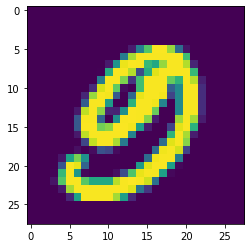

In [20]:
index=0
plt.imshow(np.reshape(x_test[index],(28,28)))
print('Prediction =' +model.predict([x_test[0]])[0])

In [22]:
#we derive the confusion matrix and beautify it....
cm = metrics.confusion_matrix(y_test,predictions)
cm

array([[1325,    1,    6,    2,    4,   10,   12,    4,   13,    2],
       [   0, 1575,    7,    4,    2,    6,    0,    2,   18,    3],
       [   5,   15, 1223,   31,   10,   11,   19,   12,   34,    7],
       [   2,    8,   32, 1295,    0,   40,    4,   15,   25,    6],
       [   3,    5,    8,    3, 1277,    3,   14,    4,   13,   48],
       [  11,    3,   13,   46,    8, 1056,   30,    1,   36,   19],
       [   6,    5,   14,    0,   12,   11, 1324,    2,    3,    0],
       [   4,    6,   25,   12,    9,    2,    1, 1341,    3,   44],
       [  10,   28,   19,   28,    5,   37,   15,    8, 1201,   13],
       [   7,    6,    4,   15,   34,    9,    0,   40,   12, 1294]],
      dtype=int64)

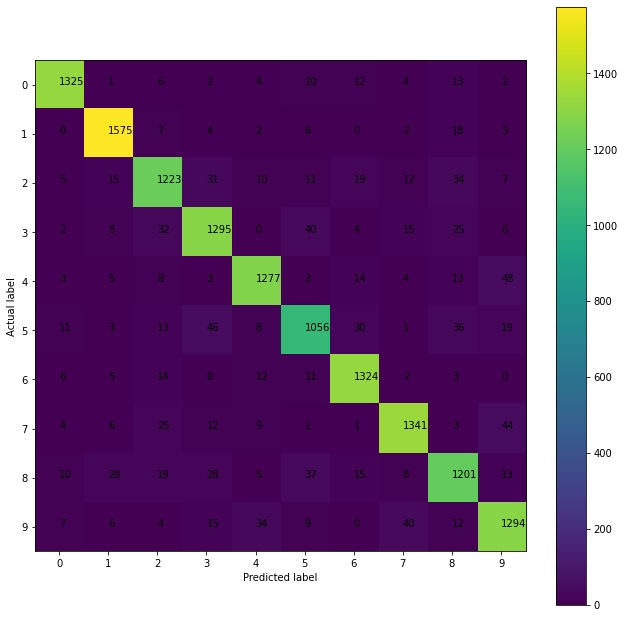

In [36]:
plt.figure(figsize=(11,11))
plt.imshow(cm)
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y,x))